# Web 1 - How to get data from the Internet

In [ ]:
# New module
import requests

# Known modules
import json
import pandas as pd
from pandas import Series, DataFrame

###  P10 check-in

In [ ]:
# It is very important to check auto-grader test results on p10 in a timely manner.
# Take a few minutes to verify if you hardcoded the slashes in P10 rather than using os.path.join? 
       # Your code won't clear auto-grader if you hardcode either "/" or "\" 
       # for *ANY* relative path in the entire project
# Check your code and check the autograder as soon as possible.

### Warmup 1: Read the data from "IMDB-Movie-Data.csv" into a pandas DataFrame called "movies"

### Warmup 2: fixing duplicate index columns

Notice that there are two index columns
- That happened because when you write a csv from pandas to a file, it writes a new index column
- So if the DataFrame already contains an index, you are going to get two index columns
- Let's fix that problem

In [ ]:
#use slicing to retain all the rows and columns excepting for column with integer position 0
movies = movies.iloc[:, 1:] 
movies

In [ ]:
movies.to_csv("better_movies.csv", index = False)

### Warmup 3: Which movie has highest rating?

### Warmup 4: Which movies were released in 2020?

### Warmup 5a: What does this function do?

In [ ]:
def format_revenue(revenue):
    if type(revenue) == float: # need this in here if we run code multiple times
        return revenue
    elif revenue[-1] == 'M': # some have an "M" at the end
        return float(revenue[:-1]) * 1e6
    else:                    # otherwise, assume millions.
        return float(revenue) * 1e6

### Warmup 5b: Using the above function, create a new column called "Revenue in dollars" by applying appropriate conversion to Revenue column.

### Warmup 6: What are the top 10 highest-revenue movies?

### Warmup 7: Which shortest movies (below average runtime) have highest rating?

### Learning Objectives

- Make a request for data using requests.get(URL)
- Check the status of a request/response
- Extract the text of a response
- Create a json file from a response
- State and practice good etiquette when getting data

### Core Ideas:
 - Network structure
     - Client / server
     - Request / response
  
    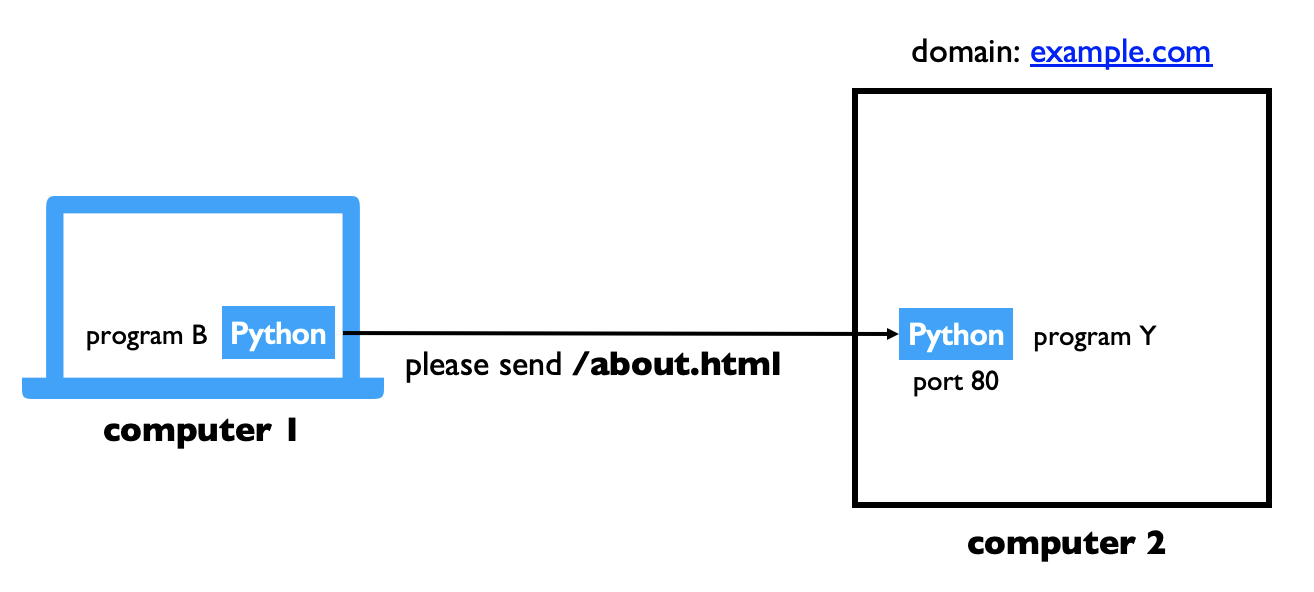
    
 - HTTP protocol
     - URL
     - Headers
     - Status Codes
 - The requests module

## HTTP Status Codes you need to know
- 200: success
- 404: not found

Here is a list of all status codes, you do NOT need to memorize it: https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

## requests.get : Simple string example
- URL: https://cs220.cs.wisc.edu/hello.txt

In [ ]:
url = "https://cs220.cs.wisc.edu/hello.txt"
r = requests.get(url) # r is the response
print(r.status_code)
print(r.text)

In [ ]:
# Q: What if the web site does not exist?
typo_url = "https://cs220.cs.wisc.edu/hello.txttttt"
r = requests.get(typo_url)
print(r.status_code)
print(r.text)

# A: 

In [ ]:
# We can check for a status_code error by using an assert
typo_url = "https://cs220.cs.wisc.edu/hello.txttttt"
r = requests.get(typo_url)
assert r.status_code == 200
print(r.status_code)
print(r.text)


In [ ]:
# Instead of using an assert, we often use raise_for_status()
r = requests.get(typo_url)
r.raise_for_status() #similar to asserting r.status_code == 200
r.text

# Note the error you get.... We will use this in the next cell

In [ ]:
# Let's try to catch that error

try:

except:
    print("oops!!", e)
    

In [ ]:
# we often need to prepend the names of exceptions with the name of the module
# fix the error from above

try:

except:
    print("oops!!", e)
    


## requests.get : JSON file example
- URL: https://cs220.cs.wisc.edu/scores.json
- `json.load` (FILE_OBJECT)
- `json.loads` (STRING)

In [ ]:
# GETting a JSON file, the long way
url = "https://cs220.cs.wisc.edu/scores.json"
r = requests.get(url)
r.raise_for_status()
urltext = r.text
print(urltext)
d = json.loads(urltext)
print(type(d), d)

In [ ]:
# GETting a JSON file, the shortcut way
url = "https://cs220.cs.wisc.edu/scores.json"
#Shortcut to bypass using json.loads()
r = requests.get(url)
r.raise_for_status()
d2 = r.json()
print(type(d2), d2)

## Good GET Etiquette

Don't make a lot of requests to the same server all at once.
 - Requests use up the server's time
 - Major websites will often ban users who make too many requests
 - You can break a server....similar to DDoS attacks (DON'T DO THIS)
 
In CS220 we will usually give you a link to a copied file to avoid overloading the site.


### Explore real-world JSON

How to explore an unknown JSON?
- If you run into a `dict`, try `.keys()` method to look at the keys of the dictionary, then use lookup process to explore further
- If you run into a `list`, iterate over the list and print each item

### Weather for UW-Madison campus
- URL: https://api.weather.gov/gridpoints/MKX/37,63/forecast

In [ ]:
# TODO: GET the forecast

# TODO: explore the type of the data structure 

# display the data


In [ ]:
# TODO: display the keys of the weather_data dict

# TODO: lookup the value corresponding to the 'properties'

# TODO: you know what to do next ... explore type again


In [ ]:
# TODO: display the keys of the properties dict

# TODO: lookup the value corresponding to the 'periods'

# TODO: you know what to do next ... explore type again


In [ ]:
# TODO: extract periods list into a variable

# TODO: create a DataFrame using periods_list
# TODO: What does each inner data structure represent in your DataFrame?
#       Keep in mind that outer data structure is a list.

#### What is the maximum and minimum observed temperatures? Include the temperatureUnit in your display

In [ ]:
min_temp = 
idx_min = 
min_unit = 

max_temp = 
idx_max = 
max_unit = 

print("Minimum observed temperature is: {} degree {}".format(min_temp, min_unit))
print("Maximum observed temperature is: {} degree {}".format(max_temp, max_unit))

#### Which days `detailedForecast` contains `snow`?

In [ ]:
snow_days_df = 
snow_days_df

In [ ]:
# Extract only the name column information for the subset DataFrame


#### Which day's `detailedForecast` has the most lengthy description?

In [ ]:
idx_max_desc = 
periods_df.iloc[idx_max_desc]['name']

In [ ]:
# What was that forecast?


### Write it out to a CSV file on your drive
You now have your own copy!

In [ ]:
# Write it all out to a single CSV file
periods_df.to_csv("campus_weather.csv", index=False)

### Other Cool APIs

- City of Madison Transit: http://transitdata.cityofmadison.com/
- Reddit: https://reddit.com/r/UWMadison.json
- Lord of the Rings: https://the-one-api.dev/
- Pokemon: https://pokeapi.co/

Remember: Be judicious when making requests; don't overwhelm the server! :)

## Next Time
What other documents can we get via the Web? HTML is very popular! We'll explore this.